In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("data/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
print("Size of the data : ", df.shape)

Size of the data :  (200, 5)


### Segmentation using Age and Spending Score

In [6]:
X = df[["Age", "Spending Score (1-100)"]]
X.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [7]:
import scipy.cluster.hierarchy as shc

#### Using just 5 points initially for better undersatnding

In [54]:
agglo_clusters_5 = shc.linkage(X.iloc[:5,:])
agglo_clusters_5
# return a (n-1)x4 matrix where first two columns contain the cluster(point) id(index) to form the next cluster.
# 3rd column represents the distance between the merging clusters.
# 4th column represents number of original observations in the newly formed cluster.

array([[ 1.        ,  3.        ,  4.47213595,  2.        ],
       [ 0.        ,  4.        , 12.04159458,  2.        ],
       [ 2.        ,  6.        , 33.01514804,  3.        ],
       [ 5.        ,  7.        , 37.85498646,  5.        ]])

In [55]:
pd.DataFrame(agglo_clusters_5, columns = ["Cluster_id1", "Cluster_id2", "distance", "points_in_new_cluster"])

,Cluster_id1,Cluster_id2,distance,points_in_new_cluster
0,1.0,3.0,4.472136,2.0
1,0.0,4.0,12.041595,2.0
2,2.0,6.0,33.015148,3.0
3,5.0,7.0,37.854986,5.0


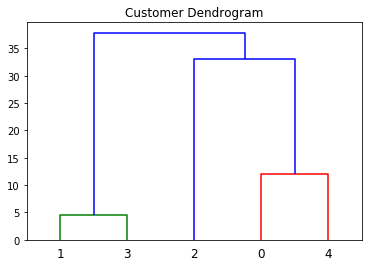

In [56]:
plt.title("Customer Dendrogram")
dend = shc.dendrogram(agglo_clusters_5)

#### Using the complete data

In [57]:
agglo_clusters = shc.linkage(X,method = "ward")
agglo_clusters

array([[ 16.        ,  20.        ,   0.        ,   2.        ],
       [ 42.        , 146.        ,   0.        ,   2.        ],
       [ 37.        , 159.        ,   0.        ,   2.        ],
       [147.        , 197.        ,   0.        ,   2.        ],
       [  1.        ,  35.        ,   0.        ,   2.        ],
       [135.        , 183.        ,   0.        ,   2.        ],
       [154.        , 194.        ,   0.        ,   2.        ],
       [ 12.        , 176.        ,   0.        ,   2.        ],
       [ 61.        , 111.        ,   1.        ,   2.        ],
       [ 65.        ,  68.        ,   1.        ,   2.        ],
       [ 78.        ,  95.        ,   1.        ,   2.        ],
       [ 75.        , 103.        ,   1.        ,   2.        ],
       [ 58.        ,  97.        ,   1.        ,   2.        ],
       [ 49.        ,  94.        ,   1.        ,   2.        ],
       [ 55.        ,  71.        ,   1.        ,   2.        ],
       [ 98.        , 214

In [58]:
agglo_clusters.shape

(199, 4)

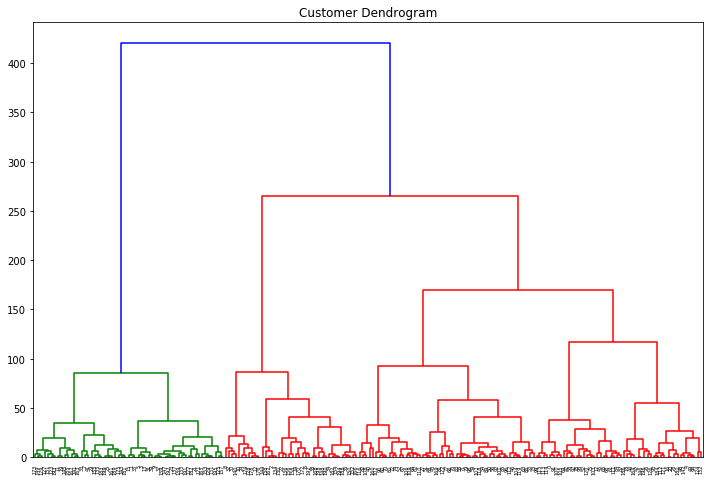

In [70]:
plt.figure(figsize = (12,8))
plt.title("Customer Dendrogram")
dend = shc.dendrogram(shc.linkage(X, method = "ward"))

### Implementation using sklearn

In [75]:
from sklearn.cluster import AgglomerativeClustering 

In [76]:
agglo_clustering = AgglomerativeClustering(n_clusters = 4, affinity = "euclidean", linkage = "ward")
agglo_clustering.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)

In [77]:
labels = agglo_clustering.labels_
labels

array([0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 0, 0, 3, 0, 3,
       2, 3, 2, 3, 0, 1, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 3, 0, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 0, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3,
       2, 3], dtype=int64)

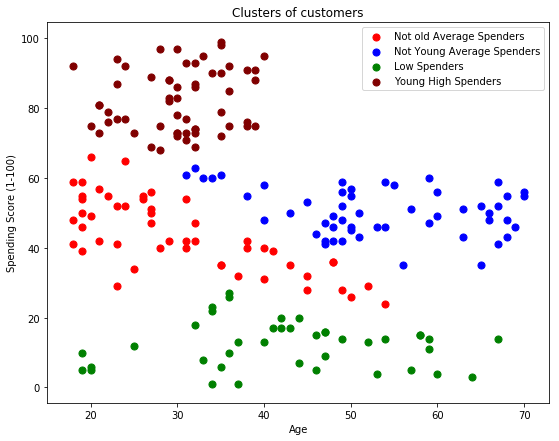

In [79]:
plt.figure(figsize = (9,7))
plt.scatter(X.values[labels == 0, 0], X.values[labels == 0, 1], s = 50, c = 'red', label = 'Not old Average Spenders')
plt.scatter(X.values[labels == 1, 0], X.values[labels == 1, 1], s = 50, c = 'blue', label = 'Not Young Average Spenders')
plt.scatter(X.values[labels == 2, 0], X.values[labels == 2, 1], s = 50, c = 'green', label = 'Low Spenders')
plt.scatter(X.values[labels == 3, 0], X.values[labels == 3, 1], s = 50, c = 'maroon', label = 'Young High Spenders')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [28]:
from scipy.spatial import distance_matrix 

In [80]:
dist = distance_matrix(X, X)
dist

array([[ 0.        , 42.04759208, 33.01514804, ..., 37.33630941,
        24.69817807, 45.35416188],
       [42.04759208,  0.        , 75.00666637, ..., 13.03840481,
        63.95310782,  9.21954446],
       [33.01514804, 75.00666637,  0.        , ..., 69.05070601,
        16.97056275, 77.64663547],
       ...,
       [37.33630941, 13.03840481, 69.05070601, ...,  0.        ,
        56.        ,  9.21954446],
       [24.69817807, 63.95310782, 16.97056275, ..., 56.        ,
         0.        , 65.03076195],
       [45.35416188,  9.21954446, 77.64663547, ...,  9.21954446,
        65.03076195,  0.        ]])